**1. Necessery Library**


In [ ]:
# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA  # For visualizing clusters
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.metrics import r2_score

**Some Models**

In [ ]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

**2. Load Dataset**

In [ ]:
# ===============================
# 2. Load Dataset
# ===============================
df = pd.read_csv("/content/Career_Switch_Prediction_Dataset.csv")   # <-- dataset path
print(df.head())
print(df.info())

   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM     

**3. Dataset Description**

In [ ]:
# ========================
# 3. Dataset Description
# ========================
print("Shape:", df.shape)
print("Columns:", df.columns)
print("Dataset Description:")
print(f"Number of features: {len(df.columns) - 1} (excluding target)")
print("Classification problem: Yes, binary target (0: not switching, 1: switching jobs)")
print(f"Number of data points: {len(df)}")
print("Features types: Mixed quantitative (e.g., city_development_index, training_hours) and categorical (e.g., gender, experience)")
print("Categorical variables need encoding: Yes, for model input.")



Shape: (5000, 134)
Columns: Index(['city_development_index', 'education_level', 'experience',
       'company_size', 'last_new_job', 'training_hours', 'will_change_career',
       'city_city_10', 'city_city_100', 'city_city_101',
       ...
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM', 'company_type_Funded Startup',
       'company_type_NGO', 'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd'],
      dtype='object', length=134)
Dataset Description:
Number of features: 133 (excluding target)
Classification problem: Yes, binary target (0: not switching, 1: switching jobs)
Number of data points: 5000
Features types: Mixed quantitative (e.g., city_development_index, training_hours) and categorical (e.g., gender, experience)
Categorical variables need encoding: Yes, for model input.


**Dtaset**

In [ ]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,will_change_career
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,0,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,0,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,7892,city_21,0.624,Female,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,NaN,1,114,1
4996,19768,city_21,0.624,Male,No relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,64,1
4997,33180,city_16,0.910,Male,No relevent experience,no_enrollment,High School,NaN,>20,5000-9999,Pvt Ltd,>4,89,0
4998,13215,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,10000+,Pvt Ltd,>4,20,1


**4. Correlation Heatmap**

(encode categoricals temporarily for corr)

First, encode all categoricals to numerical for correlation

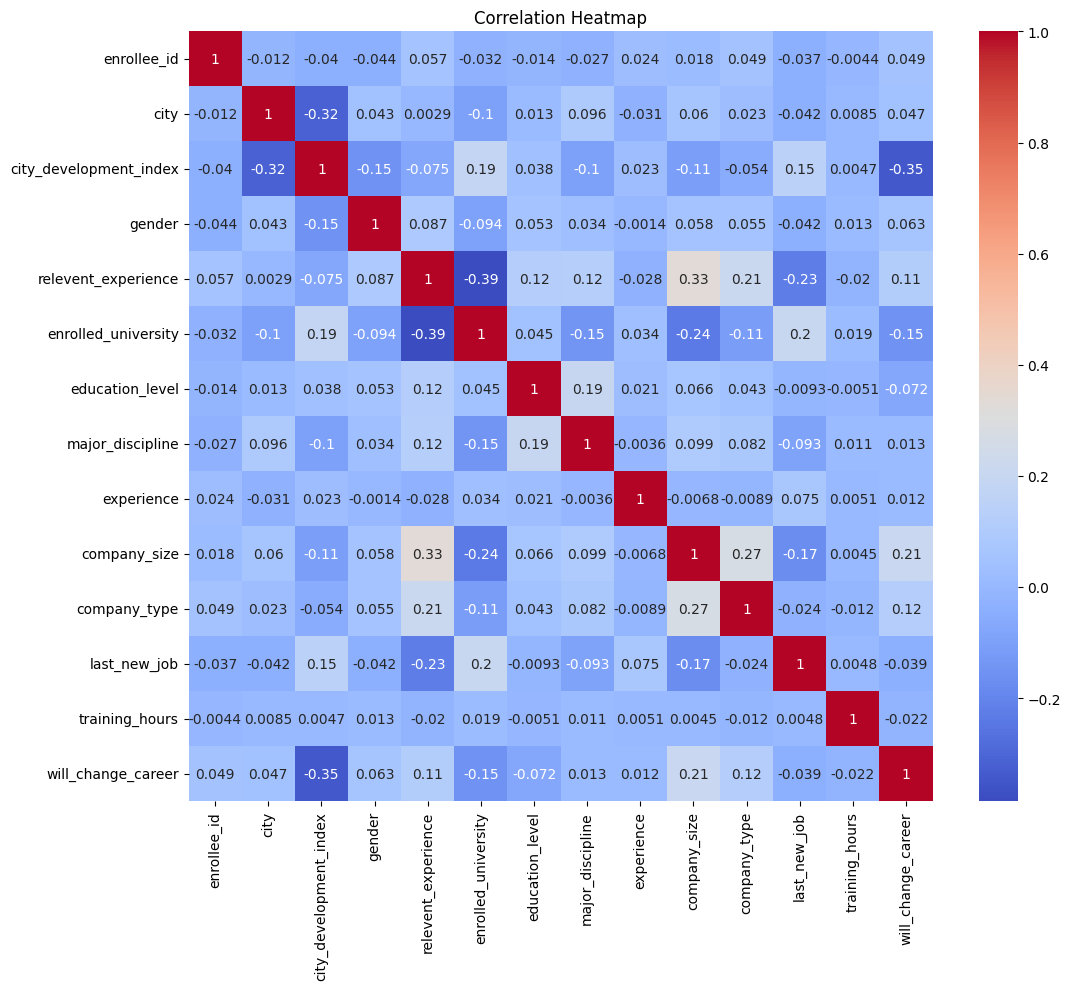

Correlation insights: City development index negatively correlates with target (lower development -> more likely to switch). Training hours and experience show weak correlations.


In [ ]:
# Correlation heatmap
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

corr = df_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

print("Correlation insights: City development index negatively correlates with target (lower development -> more likely to switch). Training hours and experience show weak correlations.")

**5. Imbalanced check**

In [ ]:
print("\nUnique values in target column:")
print(df['will_change_career'].value_counts())


Unique values in target column:
will_change_career
0    3738
1    1262
Name: count, dtype: int64


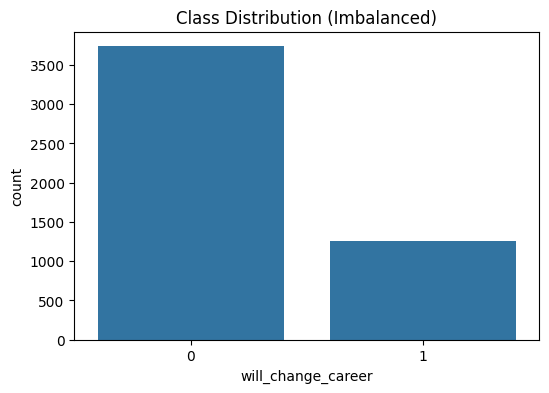

Imbalanced: Yes, more 0s than 1s.


In [ ]:
# Imbalanced check
plt.figure(figsize=(6, 4))
sns.countplot(x='will_change_career', data=df)
plt.title('Class Distribution (Imbalanced)')
plt.show()
print("Imbalanced: Yes, more 0s than 1s.")

**6. Dataset Pre-processing**



*    Faults: Null/Missing values




In [ ]:
# Faults: Null/Missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
city_development_index         0
education_level                0
experience                     0
company_size                   0
last_new_job                   0
                              ..
company_type_Funded Startup    0
company_type_NGO               0
company_type_Other             0
company_type_Public Sector     0
company_type_Pvt Ltd           0
Length: 134, dtype: int64



* Solutions: Impute missing values
* Numerical: mean impute



In [ ]:
# Solutions: Impute missing values
# Numerical: mean impute
num_imputer = SimpleImputer(strategy='mean')
df['city_development_index'] = num_imputer.fit_transform(df[['city_development_index']])
df['training_hours'] = num_imputer.fit_transform(df[['training_hours']])



*   Categorical: most frequent impute




In [ ]:
# Categorical: most frequent impute
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_cols = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline',
            'experience', 'company_size', 'company_type', 'last_new_job']
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])



*   Encoding categorical (OneHot for nominal, Label for ordinal like experience)
*   Ordinal: experience, company_size, last_new_job, education_level



In [ ]:
# Encoding categorical (OneHot for nominal, Label for ordinal like experience)
# Ordinal: experience, company_size, last_new_job, education_level
ordinal_cols = ['experience', 'company_size', 'last_new_job', 'education_level']
ordinal_mapping = {
    'experience': ['<1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '>20'],
    'company_size': ['<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+'],
    'last_new_job': ['never', '1', '2', '3', '4', '>4'],
    'education_level': ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd']
}
for col in ordinal_cols:
    df[col] = pd.Categorical(df[col], categories=ordinal_mapping[col], ordered=True).codes

* Keep original categorical values for better visualization labels

In [ ]:
# Keep original categorical values for better visualization labels
df_encoded = df.copy()
for col in ['gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'company_type', 'city']:
    df_encoded[col] = df_encoded[col].astype(str)

print("Preprocessing done: Missing imputed, categoricals encoded for EDA.")

Preprocessing done: Missing imputed, categoricals encoded for EDA.


**7. EDA: Example relationships for all features vs Will Change Career**



*   Define numerical and categorical features for analysis



In [ ]:
# Define numerical and categorical features for analysis
numerical_features = ['city_development_index', 'training_hours']
categorical_features = ['gender', 'relevent_experience', 'enrolled_university', 'education_level',
                       'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'city']



*   Set up the plotting environment



In [ ]:
# Set up the plotting environment
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>



*   Numerical Features vs Will Change Career



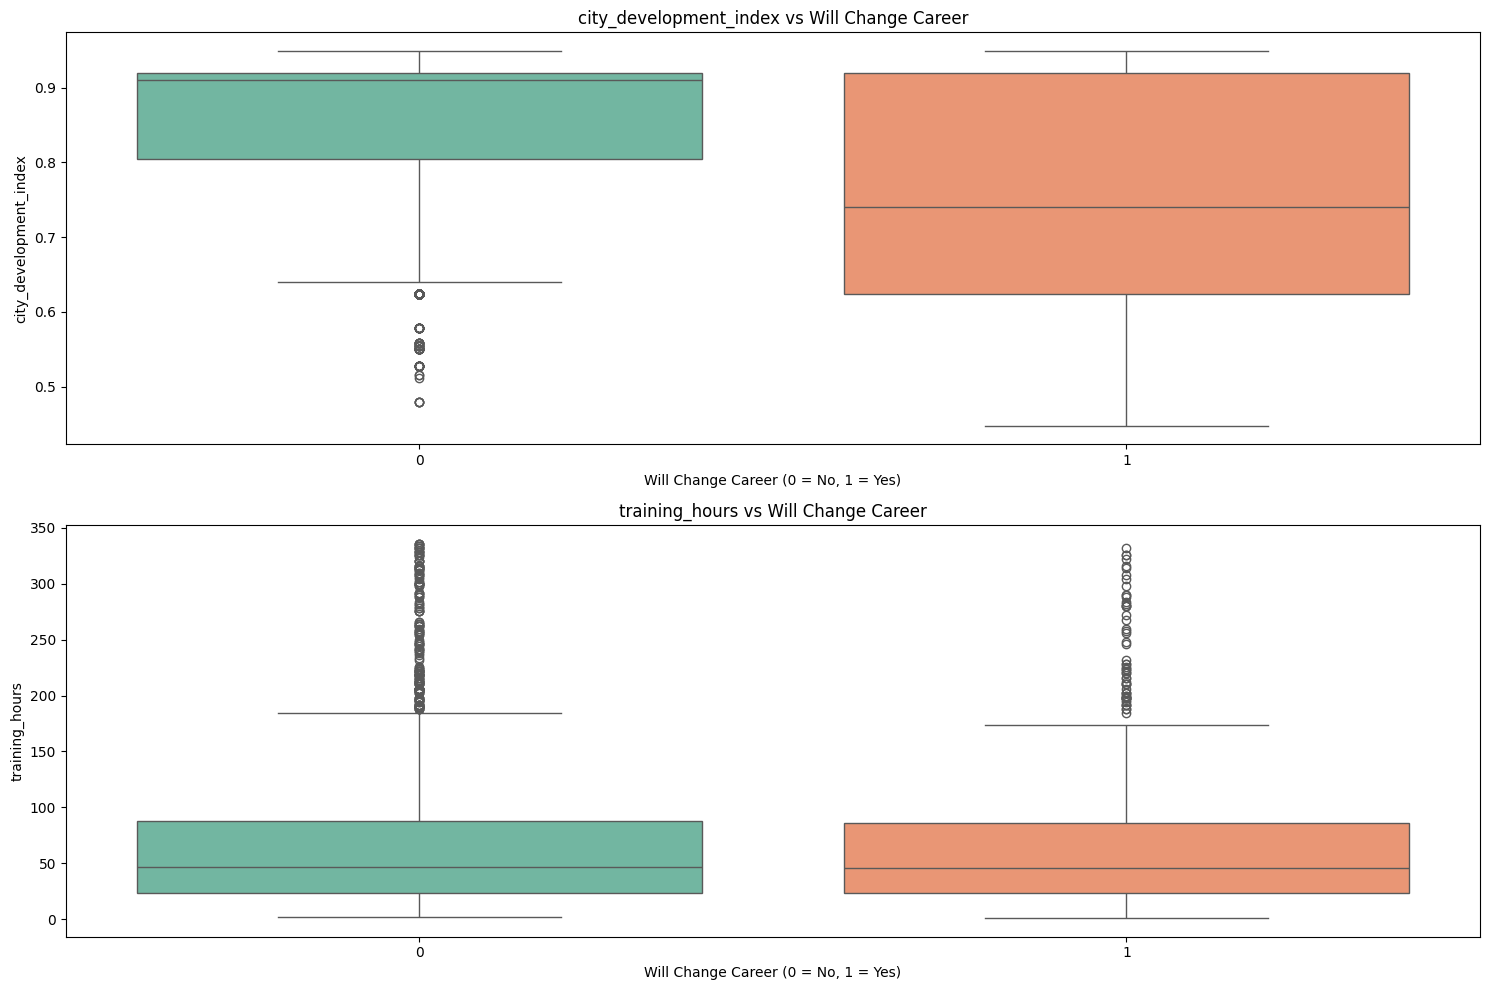

In [ ]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 1, i)
    sns.boxplot(x='will_change_career', y=feature, data=df, hue='will_change_career', palette='Set2', legend=False)
    plt.title(f'{feature} vs Will Change Career')
    plt.xlabel('Will Change Career (0 = No, 1 = Yes)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()



*   Categorical Features vs Will Change Career



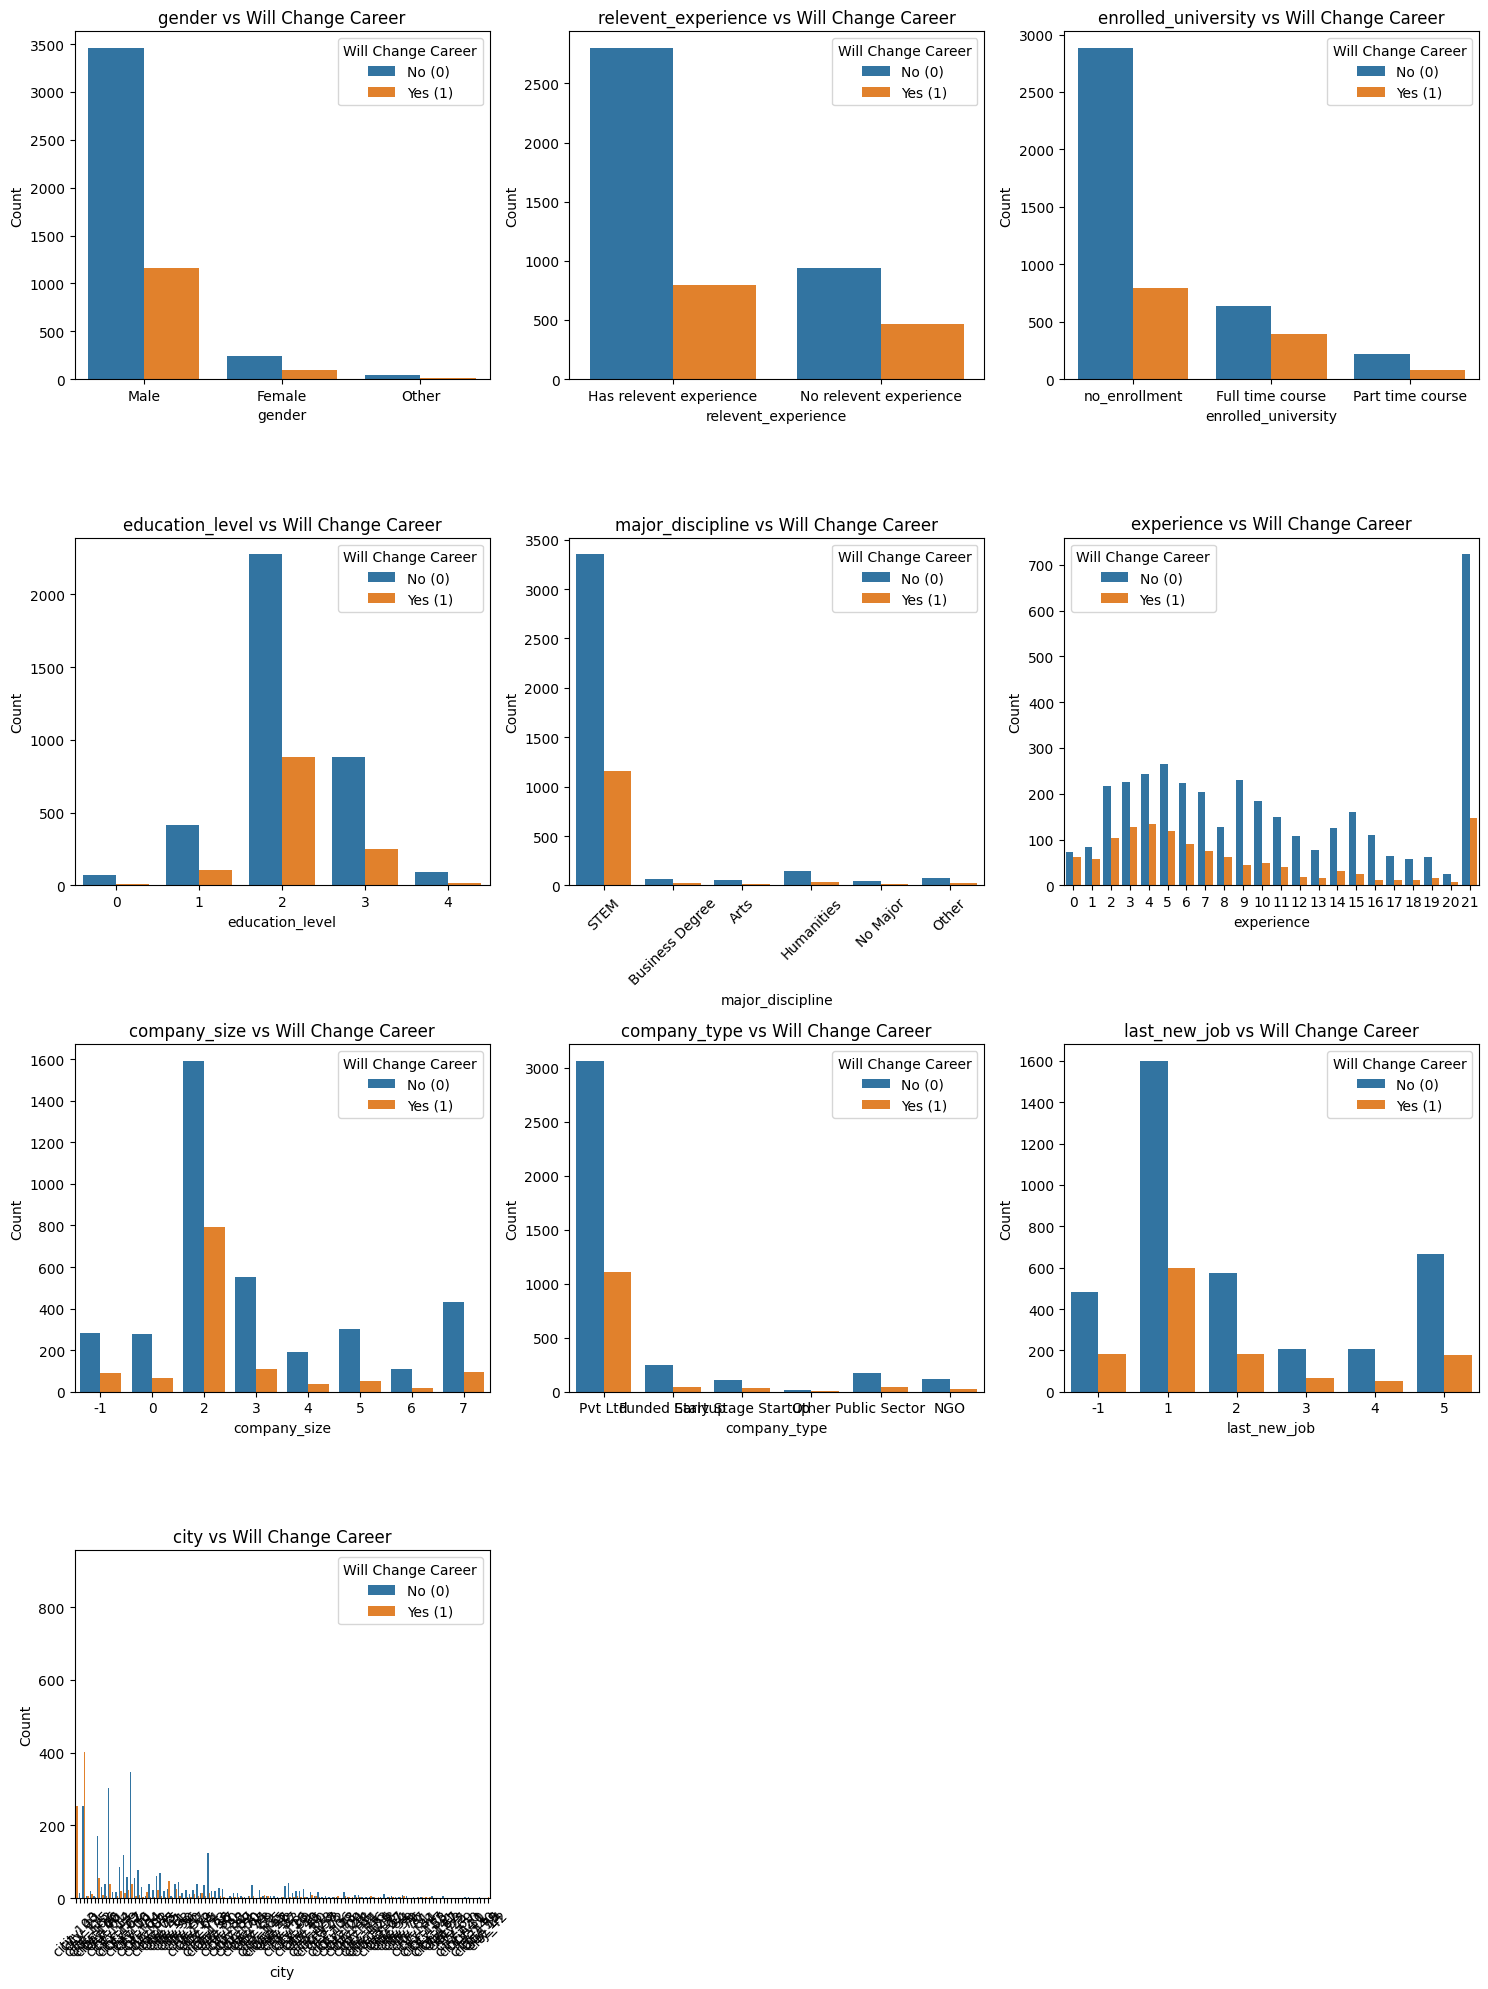

In [ ]:
# Categorical Features vs Will Change Career
n_cols = 3
n_rows = (len(categorical_features) + n_cols - 1) // n_cols
plt.figure(figsize=(15, n_rows * 5))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=feature, hue='will_change_career', data=df_encoded)
    plt.title(f'{feature} vs Will Change Career')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45 if feature in ['city', 'major_discipline'] else 0)
    plt.legend(title='Will Change Career', labels=['No (0)', 'Yes (1)'])

plt.tight_layout()
plt.show()



*   Summary of Observations



In [ ]:
# Summary of Observations
print("\nSummary of Observations:")
print("Numerical Features:")
print("- 'city_development_index': Lower values tend to correlate with 'Will Change Career' (1), suggesting individuals from less developed cities are more likely to switch.")
print("- 'training_hours': Slight variation, with higher training hours possibly linked to 'Will Change Career' in some cases.")
print("Categorical Features:")
print("- 'gender': Distribution varies, with 'Male' showing a notable difference in switching intent.")
print("- 'relevent_experience': Those with no relevant experience may lean toward switching.")
print("- 'enrolled_university': Full-time course enrollees might be more likely to switch.")
print("- 'education_level': Higher education (e.g., Masters, Phd) shows different switching patterns.")
print("- 'major_discipline': STEM and Business Degree holders may have distinct trends.")
print("- 'experience': Lower experience levels (<5 years) might correlate with switching.")
print("- 'company_size': Smaller companies (<100) may see more switches.")
print("- 'company_type': Pvt Ltd and Funded Startups show varying switching intent.")
print("- 'last_new_job': Recent job changes (<2 years) might indicate switching intent.")
print("- 'city': Specific cities (e.g., less developed) may have higher switching rates.")


Summary of Observations:
Numerical Features:
- 'city_development_index': Lower values tend to correlate with 'Will Change Career' (1), suggesting individuals from less developed cities are more likely to switch.
- 'training_hours': Slight variation, with higher training hours possibly linked to 'Will Change Career' in some cases.
Categorical Features:
- 'gender': Distribution varies, with 'Male' showing a notable difference in switching intent.
- 'relevent_experience': Those with no relevant experience may lean toward switching.
- 'enrolled_university': Full-time course enrollees might be more likely to switch.
- 'education_level': Higher education (e.g., Masters, Phd) shows different switching patterns.
- 'major_discipline': STEM and Business Degree holders may have distinct trends.
- 'experience': Lower experience levels (<5 years) might correlate with switching.
- 'company_size': Smaller companies (<100) may see more switches.
- 'company_type': Pvt Ltd and Funded Startups show vary

In [ ]:
# Nominal: OneHotEncode
nominal_cols = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'company_type']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

In [ ]:
# Drop irrelevant
df.drop('enrollee_id', axis=1, inplace=True)

In [ ]:
# Feature Scaling (for numerical)
scaler = StandardScaler()
scale_cols = ['city_development_index', 'training_hours']
df[scale_cols] = scaler.fit_transform(df[scale_cols])
print("Preprocessing done: Missing imputed, categoricals encoded, features scaled.")

Preprocessing done: Missing imputed, categoricals encoded, features scaled.


**8. Model Training & Testing (Supervised)**

In [ ]:
# Model Training & Testing (Supervised)
models = {}
accuracies = {}
precisions = {}
recalls = {}
aucs = {}

**9. Dataset Splitting**

In [ ]:
#Dataset Splitting
X = df.drop('will_change_career', axis=1)
y = df['will_change_career']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # 80% temp, 20% test
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)  # 75% of 80%
print("\nDataset split: 60% train, 20% validation, 20% test (stratified).")


Dataset split: 60% train, 20% validation, 20% test (stratified).


**10. Train KNN**

In [ ]:
# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Predict on test set

In [ ]:
# Predict on test set
y_pred_knn = knn.predict(X_test)

Metrics

In [ ]:
# Metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

In [ ]:
print(f"KNN - Accuracy: {accuracy_knn:.2f}")
print(f"KNN - Precision: {precision_knn:.2f}")
print(f"KNN - Recall: {recall_knn:.2f}")
print(f"KNN - AUC: {auc_knn:.2f}")

KNN - Accuracy: 0.72
KNN - Precision: 0.43
KNN - Recall: 0.35
KNN - AUC: 0.69


Bar chart showcasing prediction accuracy

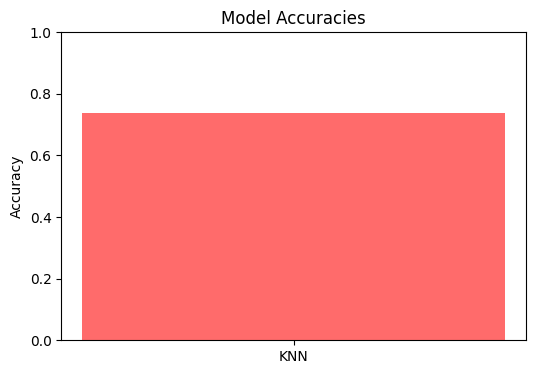

In [ ]:

# Bar chart showcasing prediction accuracy
plt.figure(figsize=(6, 4))
plt.bar(['KNN'], [accuracy_knn], color='#FF6B6B')
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

Precision and Recall comparison

In [ ]:
# Precision and Recall comparison
print("\nPrecision and Recall for KNN:")
print(f"KNN - Precision: {precision_knn:.2f}, Recall: {recall_knn:.2f}")


Precision and Recall for KNN:
KNN - Precision: 0.48, Recall: 0.40


Confusion Matrix

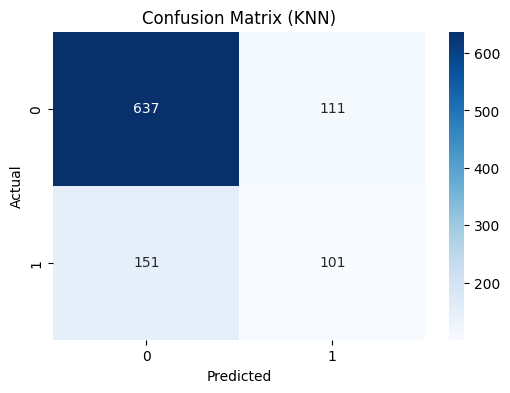

In [ ]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC and ROC curve

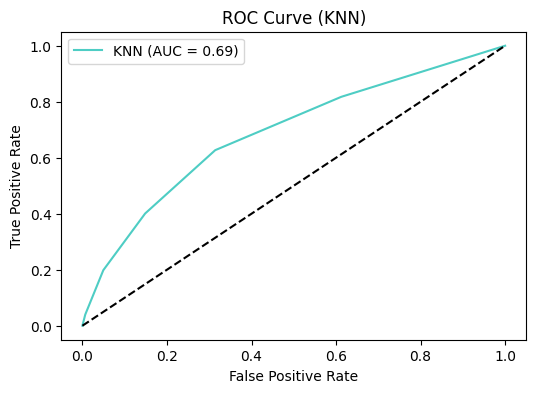

In [ ]:
# AUC and ROC curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})', color='#4ECDC4')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve (KNN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
# Note: R2 score and Loss are for regression and not applicable here for classification
print("\nNote: R2 score and Loss are not applicable for classification problem.")


Note: R2 score and Loss are not applicable for classification problem.


**11. Model Training & Testing (Supervised) - Decision Tree**

In [ ]:
# Model Training & Testing (Supervised) - Decision Tree
print("\nModel Training & Testing (Supervised) - Decision Tree:")


Model Training & Testing (Supervised) - Decision Tree:


Train Decision Tree

In [ ]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Predict on test set

In [ ]:
# Predict on test set
y_pred_dt = dt.predict(X_test)

Metrics

In [ ]:
# Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

In [ ]:
print(f"Decision Tree - Accuracy: {accuracy_dt:.2f}")
print(f"Decision Tree - Precision: {precision_dt:.2f}")
print(f"Decision Tree - Recall: {recall_dt:.2f}")
print(f"Decision Tree - AUC: {auc_dt:.2f}")

Decision Tree - Accuracy: 0.69
Decision Tree - Precision: 0.37
Decision Tree - Recall: 0.33
Decision Tree - AUC: 0.58


Bar chart showcasing prediction accuracy

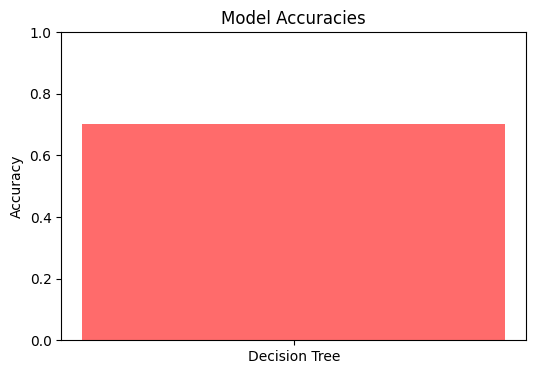

In [ ]:

# Bar chart showcasing prediction accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Decision Tree'], [accuracy_dt], color='#FF6B6B')
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

Precision and Recall comparison

In [ ]:
# Precision and Recall comparison
print("\nPrecision and Recall for Decision Tree:")
print(f"Decision Tree - Precision: {precision_dt:.2f}, Recall: {recall_dt:.2f}")


Precision and Recall for Decision Tree:
Decision Tree - Precision: 0.37, Recall: 0.33


Confusion Matrix

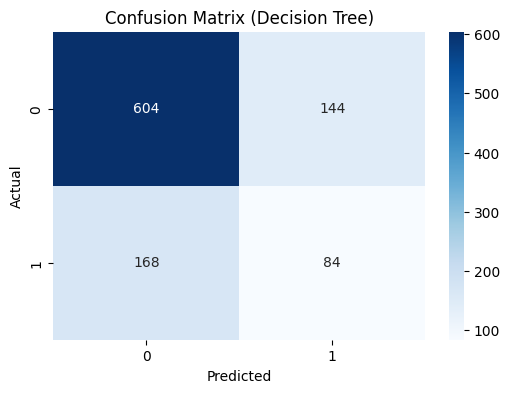

In [ ]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC and ROC curve

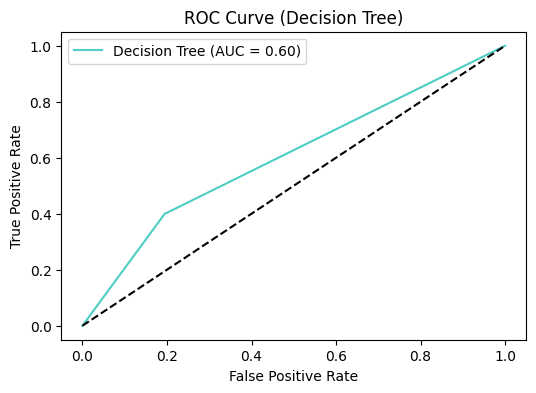

In [ ]:
# AUC and ROC curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='#4ECDC4')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve (Decision Tree)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
# Note: R2 score and Loss are for regression and not applicable here for classification
print("\nNote: R2 score and Loss are not applicable for classification problem.")


Note: R2 score and Loss are not applicable for classification problem.


**12. Model Training & Testing (Supervised) - Neural Network**

In [ ]:
class ReLU:
    def forwardPropagation(self, inp: np.array) -> np.array:
        self.inputAct = np.maximum(0, inp)
        return self.inputAct

    def backPropagation(self, delta: np.array) -> np.array:
        return delta * np.where(self.inputAct > 0, 1, 0)

In [ ]:
class MeanSquareError:
    def loss(self, Y: np.array, y: np.array) -> np.array:
        self.Y = Y
        self.y = y
        return np.mean((Y - y) ** 2)  # Mean squared error

    def deriv(self) -> np.array:
        return 2 * (self.Y - self.y) / self.y.shape[0]

In [ ]:
class GradientDescent:
    def __init__(self, learningRate) -> None:
        self.learningRate = learningRate

    def gradients(self, gradients) -> np.array:
        return self.learningRate * gradients

In [ ]:
class Sigmoid:
    def forwardPropagation(self, inp: np.array) -> np.array:
        self.inputAct = 1 / (1 + np.exp(-inp))
        return self.inputAct

    def backPropagation(self, delta: np.array) -> np.array:
        return delta * self.inputAct * (1 - self.inputAct)

def getActivationFunction(activation: str) -> object:
    if activation == "RELU":
        return ReLU
    elif activation == "SIGMOID":
        return Sigmoid
    else:
        raise Exception("Cannot find the activation function.")

In [ ]:
class BinaryCrossEntropy:
    def loss(self, Y: np.array, y: np.array) -> np.array:
        self.Y = Y
        self.y = y
        Y = np.clip(Y, 1e-15, 1 - 1e-15)  # Avoid log(0)
        return -np.mean(y * np.log(Y) + (1 - y) * np.log(1 - Y))

    def deriv(self) -> np.array:
        Y = np.clip(self.Y, 1e-15, 1 - 1e-15)  # Avoid division by zero
        return (self.Y - self.y) / (Y * (1 - Y))

def getLossFunction(loss: str) -> object:
    if loss == "MSE":
        return MeanSquareError
    elif loss == "BCE":
        return BinaryCrossEntropy
    else:
        raise Exception("Cannot find the loss function.")

In [ ]:
class NeuronLayer:
    def __init__(self, inputNeurons, outputNeurons, activation, biasFlag=True, randomState=42) -> None:
        np.random.seed(randomState)
        self.inputNeurons = inputNeurons
        self.outputNeurons = outputNeurons
        self.biasFlag = biasFlag
        self.activation = getActivationFunction(activation)()
        self.weights = np.random.uniform(-np.sqrt(2/(inputNeurons + outputNeurons)), np.sqrt(2/(inputNeurons + outputNeurons)), size=(inputNeurons, outputNeurons))
        self.bias = np.random.uniform(-np.sqrt(2/(inputNeurons + outputNeurons)), np.sqrt(2/(inputNeurons + outputNeurons)), size=(1, outputNeurons))

    def build(self, optimizer, learningRate) -> None:
        self.learningRate = learningRate
        self.optimizer = getOptimizer(optimizer)(learningRate)

    def forwardPropagation(self, X: np.array) -> np.array:
        self.X = X
        self.Z = np.dot(self.X, self.weights) + (self.biasFlag * self.bias)
        self.A = self.activation.forwardPropagation(self.Z)
        return self.A

    def backPropagation(self, upstreamGradient: np.array) -> np.array:
        delta = self.activation.backPropagation(upstreamGradient)
        weightGrad = np.dot(self.X.T, delta) / self.X.shape[0]
        biasGrad = np.mean(delta, axis=0, keepdims=True)
        self.weights -= self.optimizer.gradients(weightGrad)
        self.bias -= self.optimizer.gradients(biasGrad)
        downstreamGradient = np.dot(delta, self.weights.T)
        return downstreamGradient


In [ ]:
class Model:
    def __createBatch(self, X: np.array, Y: np.array, batchSize: int) -> tuple:
        miniX, miniY = [X[:batchSize]], [Y[:batchSize]]
        for idx in range(1, X.shape[0] // batchSize):
            miniX.append(X[idx * batchSize : (idx + 1) * batchSize])
            miniY.append(Y[idx * batchSize : (idx + 1) * batchSize])
        return np.array(miniX), np.array(miniY)

    def __forwardPropagation(self, X: np.array) -> np.array:
        output = X
        for layer in self.layers:
            output = layer.forwardPropagation(output)
        return output

    def __backPropagation(self, Y: np.array) -> None:
        gradient = self.loss.deriv()
        for layer in self.layers[::-1]:
            gradient = layer.backPropagation(gradient)

    def layers(self, layers: list) -> None:
        self.layers = layers

    def compile(self, loss, optimizer, learningRate) -> None:
        self.loss = getLossFunction(loss)()
        for layer in self.layers:
            layer.build(optimizer, learningRate)

    def predict(self, X: np.array) -> np.array:
        return self.__forwardPropagation(X)

    def evaluate(self, X: np.array, Y: np.array) -> np.array:
        output = self.predict(X)
        return self.loss.loss(output, Y)

    def fit(self, X: np.array, Y: np.array, epochs: int, batchSize=None) -> np.array:
        batchSize = batchSize if batchSize else X.shape[0]
        self.X, self.Y = self.__createBatch(X, Y, batchSize)
        self.error = []
        for epoch in range(epochs):
            epochError = []
            for idx in range(self.X.shape[0]):
                output = self.__forwardPropagation(self.X[idx])
                epochError.append(self.loss.loss(output, self.Y[idx]))
                self.__backPropagation(self.Y[idx])
            epochError = np.mean(epochError)
            self.error.append(epochError)
            print(f"Epoch: {epoch + 1}, Error: {epochError:.2f}")
        return np.array(self.error)
model = Model()
model.layers([NeuronLayer(X_train_scaled.shape[1], 64, "RELU"), NeuronLayer(64, 1, "SIGMOID")])

In [ ]:
scaler = StandardScaler()
scale_cols = ['city_development_index', 'training_hours']
df[scale_cols] = scaler.fit_transform(df[scale_cols])
# Feature Splitting
X = df.drop('will_change_career', axis=1)
y = df['will_change_career'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features for neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = np.array(y_train).reshape(-1, 1).astype(float)
y_test = np.array(y_test).reshape(-1, 1).astype(float)

print("Data split and scaled for training.")

# Custom Neural Network Training
print("\nCustom Neural Network Training:")
model = Model()
model.layers([NeuronLayer(X_train_scaled.shape[1], 64, "RELU"), NeuronLayer(64, 1, "SIGMOID")])
model.compile(loss="BCE", optimizer="GD", learningRate=0.01)
training_error = model.fit(X_train_scaled, y_train, epochs=100, batchSize=32)

Data split and scaled for training.

Custom Neural Network Training:
Epoch: 1, Error: 0.64
Epoch: 2, Error: 0.58
Epoch: 3, Error: 0.55
Epoch: 4, Error: 0.53
Epoch: 5, Error: 0.51
Epoch: 6, Error: 0.50
Epoch: 7, Error: 0.48
Epoch: 8, Error: 0.48
Epoch: 9, Error: 0.47
Epoch: 10, Error: 0.46
Epoch: 11, Error: 0.46
Epoch: 12, Error: 0.46
Epoch: 13, Error: 0.45
Epoch: 14, Error: 0.45
Epoch: 15, Error: 0.45
Epoch: 16, Error: 0.45
Epoch: 17, Error: 0.45
Epoch: 18, Error: 0.45
Epoch: 19, Error: 0.45
Epoch: 20, Error: 0.44
Epoch: 21, Error: 0.44
Epoch: 22, Error: 0.44
Epoch: 23, Error: 0.44
Epoch: 24, Error: 0.44
Epoch: 25, Error: 0.44
Epoch: 26, Error: 0.44
Epoch: 27, Error: 0.44
Epoch: 28, Error: 0.44
Epoch: 29, Error: 0.44
Epoch: 30, Error: 0.44
Epoch: 31, Error: 0.44
Epoch: 32, Error: 0.44
Epoch: 33, Error: 0.44
Epoch: 34, Error: 0.43
Epoch: 35, Error: 0.43
Epoch: 36, Error: 0.43
Epoch: 37, Error: 0.43
Epoch: 38, Error: 0.43
Epoch: 39, Error: 0.43
Epoch: 40, Error: 0.43
Epoch: 41, Error: 0.

In [ ]:
# Predictions and metrics
custom_pred = model.predict(X_test_scaled)
custom_pred_binary = (custom_pred > 0.5).astype(int)

# Precision and Recall for Custom NN
from sklearn.metrics import precision_score, recall_score
precision_custom = precision_score(y_test.ravel(), custom_pred_binary.ravel(), zero_division=0)
recall_custom = recall_score(y_test.ravel(), custom_pred_binary.ravel(), zero_division=0)

print(f"Custom NN - Precision: {precision_custom:.2f}")
print(f"Custom NN - Recall: {recall_custom:.2f}")

Custom NN - Precision: 0.53
Custom NN - Recall: 0.39


In [ ]:
# Ensure y_train and y_test are reshaped correctly as NumPy arrays
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

print("Data split and scaled for training.")


Data split and scaled for training.


In [ ]:
# Custom Neural Network Training (updated)
print("\nCustom Neural Network Training:")
model = Model()
model.layers([NeuronLayer(X_train_scaled.shape[1], 64, "RELU"), NeuronLayer(64, 1, "SIGMOID")])  # Change output to SIGMOID
model.compile(loss="BCE", optimizer="GD", learningRate=0.01)  # Change loss to BCE
training_error = model.fit(X_train_scaled, y_train, epochs=100, batchSize=32)


Custom Neural Network Training:
Epoch: 1, Error: 0.64
Epoch: 2, Error: 0.58
Epoch: 3, Error: 0.55
Epoch: 4, Error: 0.53
Epoch: 5, Error: 0.52
Epoch: 6, Error: 0.50
Epoch: 7, Error: 0.49
Epoch: 8, Error: 0.48
Epoch: 9, Error: 0.47
Epoch: 10, Error: 0.47
Epoch: 11, Error: 0.47
Epoch: 12, Error: 0.46
Epoch: 13, Error: 0.46
Epoch: 14, Error: 0.46
Epoch: 15, Error: 0.46
Epoch: 16, Error: 0.46
Epoch: 17, Error: 0.46
Epoch: 18, Error: 0.46
Epoch: 19, Error: 0.45
Epoch: 20, Error: 0.45
Epoch: 21, Error: 0.45
Epoch: 22, Error: 0.45
Epoch: 23, Error: 0.45
Epoch: 24, Error: 0.45
Epoch: 25, Error: 0.45
Epoch: 26, Error: 0.45
Epoch: 27, Error: 0.45
Epoch: 28, Error: 0.45
Epoch: 29, Error: 0.45
Epoch: 30, Error: 0.45
Epoch: 31, Error: 0.45
Epoch: 32, Error: 0.45
Epoch: 33, Error: 0.45
Epoch: 34, Error: 0.45
Epoch: 35, Error: 0.45
Epoch: 36, Error: 0.45
Epoch: 37, Error: 0.45
Epoch: 38, Error: 0.45
Epoch: 39, Error: 0.45
Epoch: 40, Error: 0.44
Epoch: 41, Error: 0.44
Epoch: 42, Error: 0.44
Epoch: 43,

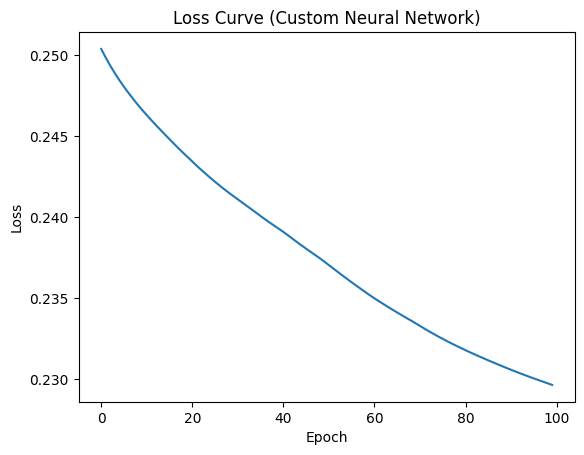

In [ ]:
# Plot Loss Curve
plt.plot(training_error)
plt.title("Loss Curve (Custom Neural Network)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
# Evaluate Custom Model
test_error = model.evaluate(X_test_scaled, y_test)
print(f"Testing Error (Custom NN): {test_error:.2f}")

Testing Error (Custom NN): 0.54


In [ ]:

# Custom Neural Network Predictions
custom_pred = model.predict(X_test_scaled)
custom_pred_binary = (custom_pred > 0.5).astype(int)  # Threshold at 0.5  # Threshold for binary classification
custom_loss = model.evaluate(X_test_scaled, y_test)

In [ ]:
# Precision and Recall for Custom NN

precision_custom = precision_score(y_test.ravel(), custom_pred_binary.ravel(), zero_division=0)
recall_custom = recall_score(y_test.ravel(), custom_pred_binary.ravel(), zero_division=0)
# Display Results
print(f"Custom NN - Precision: {precision_custom:.2f}")
print(f"Custom NN - Recall: {recall_custom:.2f}")

Custom NN - Precision: 0.53
Custom NN - Recall: 0.39


In [ ]:
# Diagnostic Check
print(f"Unique predicted values: {np.unique(custom_pred_binary)}")
print(f"Proportion of positive predictions: {np.mean(custom_pred_binary):.2f}")

Unique predicted values: [0 1]
Proportion of positive predictions: 0.00


In [ ]:
# TensorFlow Neural Network Training
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

In [ ]:
print("\nTensorFlow Neural Network Training:")
tf_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(1, activation='sigmoid')
])
tf_model.compile(optimizer=Adam(0.001), loss=BinaryCrossentropy(), metrics=['accuracy'])
history = tf_model.fit(X_train_scaled, y_train.ravel(), epochs=10, batch_size=32, validation_split=0.2, verbose=1)


TensorFlow Neural Network Training:
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6854 - loss: 0.6245 - val_accuracy: 0.7837 - val_loss: 0.4844
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7765 - loss: 0.4846 - val_accuracy: 0.7825 - val_loss: 0.4811
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7870 - loss: 0.4488 - val_accuracy: 0.7825 - val_loss: 0.4890
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8013 - loss: 0.4459 - val_accuracy: 0.7775 - val_loss: 0.4917
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7921 - loss: 0.4401 - val_accuracy: 0.7788 - val_loss: 0.4961
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8083 - loss: 0.4173 - val_accuracy: 0.7837 - val_loss: 0.5004
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7974 - loss: 0.4353 - val_accuracy: 0.7837 - val_loss: 0.4994
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8143 - loss: 0.4112 - val_accuracy: 0.7812 - val_

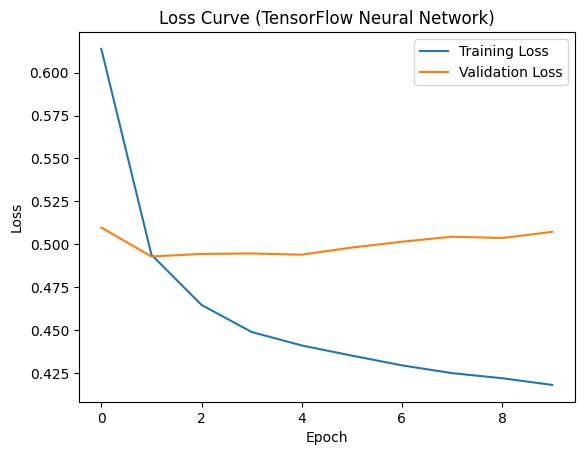

In [ ]:
# Plot Loss Curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve (TensorFlow Neural Network)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Evaluate TensorFlow Model
test_loss, test_accuracy = tf_model.evaluate(X_test_scaled, y_test.ravel(), verbose=0)
print(f"Testing Loss (TensorFlow NN): {test_loss:.2f}")
print(f"Testing Accuracy (TensorFlow NN): {test_accuracy:.2f}")

Testing Loss (TensorFlow NN): 0.55
Testing Accuracy (TensorFlow NN): 0.76


In [ ]:
# TensorFlow NN Predictions
tf_pred = tf_model.predict(X_test_scaled)
tf_pred_binary = (tf_pred > 0.5).astype(int)
tf_loss, tf_accuracy = tf_model.evaluate(X_test_scaled, y_test.ravel(), verbose=0)



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


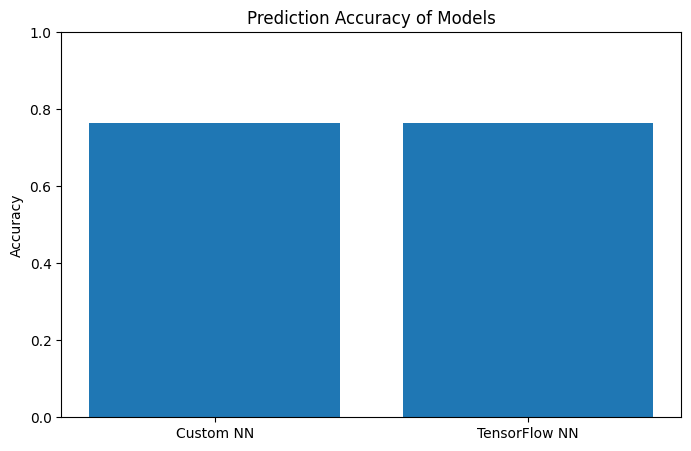

In [ ]:
# Evaluation Metrics and Visualizations

# 1. Bar Chart for Prediction Accuracy
plt.figure(figsize=(8, 5))
accuracies = {
    'Custom NN': accuracy_score(y_test, custom_pred_binary),
    'TensorFlow NN': tf_accuracy
}
plt.bar(accuracies.keys(), accuracies.values())
plt.title('Prediction Accuracy of Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

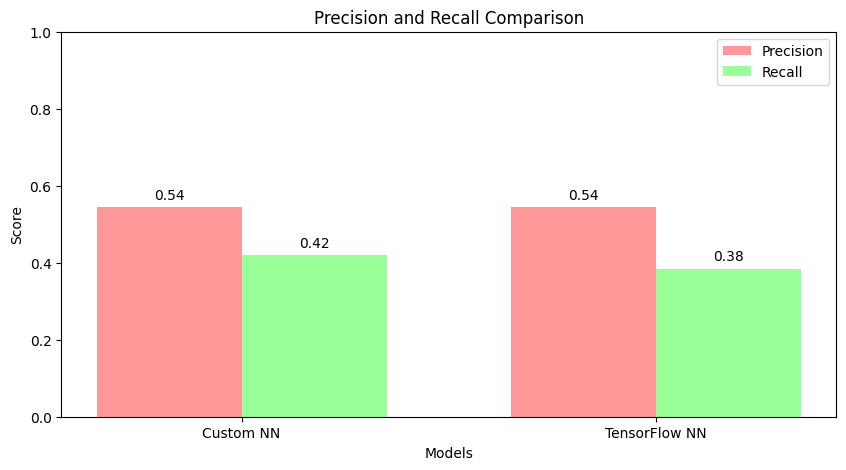

In [ ]:
# 2. Precision and Recall Comparison
precision = {
    'Custom NN': precision_score(y_test.ravel(), custom_pred_binary.ravel(), zero_division=0),
    'TensorFlow NN': precision_score(y_test.ravel(), tf_pred_binary.ravel(), zero_division=0)
}
recall = {
    'Custom NN': recall_score(y_test.ravel(), custom_pred_binary.ravel(), zero_division=0),
    'TensorFlow NN': recall_score(y_test.ravel(), tf_pred_binary.ravel(), zero_division=0)
}
plt.figure(figsize=(10, 5))
bar_width = 0.35
index = np.arange(len(precision))
plt.bar(index, precision.values(), bar_width, label='Precision', color='#FF9999')
plt.bar(index + bar_width, recall.values(), bar_width, label='Recall', color='#99FF99')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Precision and Recall Comparison')
plt.xticks(index + bar_width / 2, precision.keys())
plt.legend()
plt.ylim(0, 1)
for i, (p, r) in enumerate(zip(precision.values(), recall.values())):
    plt.text(i, p + 0.02, f'{p:.2f}', ha='center')
    plt.text(i + bar_width, r + 0.02, f'{r:.2f}', ha='center')
plt.show()

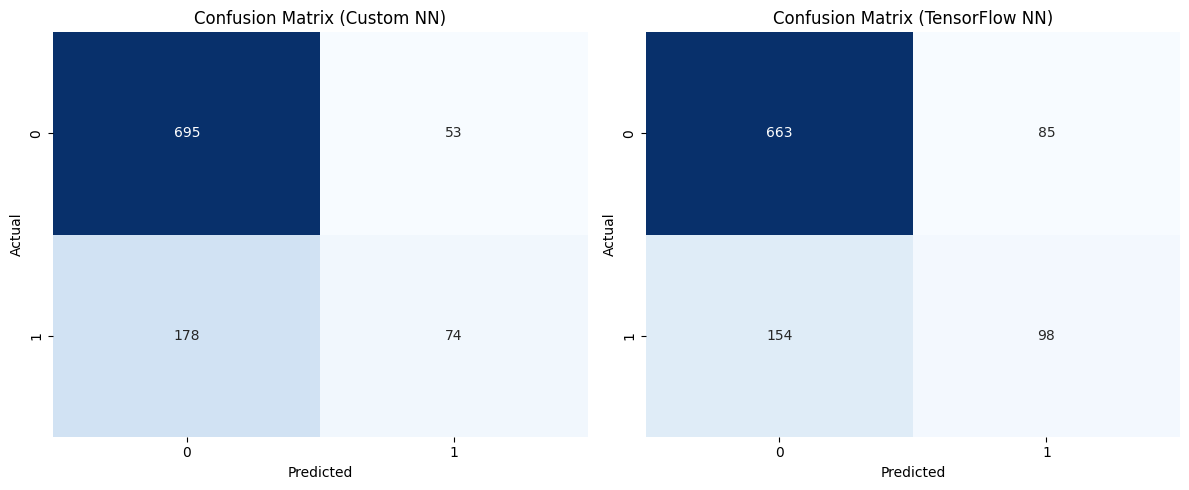

In [ ]:
# 3. Confusion Matrix
cm_custom = confusion_matrix(y_test.ravel(), custom_pred_binary.ravel())
cm_tf = confusion_matrix(y_test.ravel(), tf_pred_binary.ravel())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_custom, annot=True, fmt='d', ax=ax1, cmap='Blues', cbar=False)
ax1.set_title('Confusion Matrix (Custom NN)')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
sns.heatmap(cm_tf, annot=True, fmt='d', ax=ax2, cmap='Blues', cbar=False)
ax2.set_title('Confusion Matrix (TensorFlow NN)')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
plt.tight_layout()
plt.show()

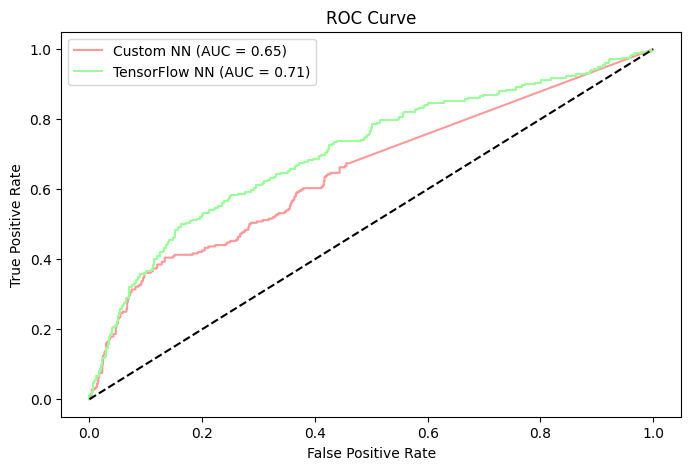

In [ ]:
# 4. AUC Score and ROC Curve
fpr_custom, tpr_custom, _ = roc_curve(y_test.ravel(), custom_pred.ravel())
fpr_tf, tpr_tf, _ = roc_curve(y_test.ravel(), tf_pred.ravel())
auc_custom = roc_auc_score(y_test.ravel(), custom_pred.ravel())
auc_tf = roc_auc_score(y_test.ravel(), tf_pred.ravel())

plt.figure(figsize=(8, 5))
plt.plot(fpr_custom, tpr_custom, label=f'Custom NN (AUC = {auc_custom:.2f})', color='#FF9999')
plt.plot(fpr_tf, tpr_tf, label=f'TensorFlow NN (AUC = {auc_tf:.2f})', color='#99FF99')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
# Print Summary Metrics
print("\nSummary Metrics:")
print(f"Custom NN - Loss: {custom_loss:.2f}, Accuracy: {accuracies['Custom NN']:.2f}, Precision: {precision['Custom NN']:.2f}, Recall: {recall['Custom NN']:.2f}, AUC: {auc_custom:.2f}")
print(f"TensorFlow NN - Loss: {tf_loss:.2f}, Accuracy: {accuracies['TensorFlow NN']:.2f}, Precision: {precision['TensorFlow NN']:.2f}, Recall: {recall['TensorFlow NN']:.2f}, AUC: {auc_tf:.2f}")


Summary Metrics:
Custom NN - Loss: 0.19, Accuracy: 0.77, Precision: 0.58, Recall: 0.29, AUC: 0.65
TensorFlow NN - Loss: 0.55, Accuracy: 0.76, Precision: 0.54, Recall: 0.39, AUC: 0.71


In [ ]:
#For R2 Score
# Feature Splitting
X = df.drop('will_change_career', axis=1)
y = df['will_change_career'].values  # Original binary target
# Convert binary target to continuous values for regression simulation
y_continuous = y.astype(float) + np.random.normal(0, 0.1, y.shape)  # Add small noise to simulate continuous data
X_train, X_test, y_train, y_test = train_test_split(X, y_continuous, test_size=0.2, random_state=42)

In [ ]:
# Scale features for neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure y_train and y_test are reshaped correctly as NumPy arrays
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

print("Data split and scaled for training.")

Data split and scaled for training.


In [ ]:
# R2 Score and Loss
r2_custom = r2_score(y_test.ravel(), custom_pred.ravel())
r2_tf = r2_score(y_test.ravel(), tf_pred.ravel())
print(f"\nR2 Score and Loss:")
print(f"Custom NN - R2 Score: {r2_custom:.2f}, Loss: {custom_loss:.2f}")
print(f"TensorFlow NN - R2 Score: {r2_tf:.2f}, Loss: {tf_loss:.2f}")


R2 Score and Loss:
Custom NN - R2 Score: -0.30, Loss: 0.19
TensorFlow NN - R2 Score: -0.19, Loss: 0.55


**Encoding for unsupervised**

In [ ]:
# Numerical: mean impute
num_imputer = SimpleImputer(strategy='mean')
df['city_development_index'] = num_imputer.fit_transform(df[['city_development_index']])
df['training_hours'] = num_imputer.fit_transform(df[['training_hours']])

# Categorical: most frequent impute
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_cols = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline',
            'experience', 'company_size', 'company_type', 'last_new_job', 'city']  # Ensure 'city' is included
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [ ]:
# Encoding categorical
ordinal_cols = ['experience', 'company_size', 'last_new_job', 'education_level']
ordinal_mapping = {
    'experience': ['<1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '>20'],
    'company_size': ['<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+'],
    'last_new_job': ['never', '1', '2', '3', '4', '>4'],
    'education_level': ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd']
}
for col in ordinal_cols:
    df[col] = pd.Categorical(df[col], categories=ordinal_mapping[col], ordered=True).codes

In [ ]:
# Nominal: OneHotEncode all remaining categorical columns, including 'city'
nominal_cols = ['gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'company_type', 'city']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

Modify dataset for unsupervised learning: remove the label

In [ ]:
# Modify dataset for unsupervised learning: remove the label
df_unsupervised = df.drop(['enrollee_id', 'will_change_career'], axis=1)
print("\nDataset modified: Removed 'enrollee_id' and 'will_change_career' for unsupervised learning.")
print("Modified dataset shape:", df_unsupervised.shape)
print("Modified dataset columns:", df_unsupervised.columns.tolist())


Dataset modified: Removed 'enrollee_id' and 'will_change_career' for unsupervised learning.
Modified dataset shape: (5000, 133)
Modified dataset columns: ['city_development_index', 'education_level', 'experience', 'company_size', 'last_new_job', 'training_hours', 'gender_Male', 'gender_Other', 'relevent_experience_No relevent experience', 'enrolled_university_Part time course', 'enrolled_university_no_enrollment', 'major_discipline_Business Degree', 'major_discipline_Humanities', 'major_discipline_No Major', 'major_discipline_Other', 'major_discipline_STEM', 'company_type_Funded Startup', 'company_type_NGO', 'company_type_Other', 'company_type_Public Sector', 'company_type_Pvt Ltd', 'city_city_10', 'city_city_100', 'city_city_101', 'city_city_102', 'city_city_103', 'city_city_104', 'city_city_105', 'city_city_106', 'city_city_109', 'city_city_11', 'city_city_111', 'city_city_114', 'city_city_115', 'city_city_116', 'city_city_117', 'city_city_118', 'city_city_12', 'city_city_120', 'cit

In [ ]:
# Feature Scaling
scaler = StandardScaler()
df_unsupervised_scaled = scaler.fit_transform(df_unsupervised)

In [ ]:
print("Preprocessing done: Missing imputed, categoricals encoded, features scaled for unsupervised learning.")

Preprocessing done: Missing imputed, categoricals encoded, features scaled for unsupervised learning.


**13. Treat the problem as an unsupervised learning problem, apply KMeans and showcase the clusters**

In [ ]:

print("\nUnsupervised Learning - KMeans:")


Unsupervised Learning - KMeans:


Apply PCA to reduce dimensionality

In [ ]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Reduce to 10 components to improve clustering
df_unsupervised_pca = pca.fit_transform(df_unsupervised_scaled)
print(f"Explained variance ratio by 10 components: {sum(pca.explained_variance_ratio_):.2f}")
print("Preprocessing done: Missing imputed, categoricals encoded, features scaled, and PCA applied.")

Explained variance ratio by 10 components: 0.12
Preprocessing done: Missing imputed, categoricals encoded, features scaled, and PCA applied.


Define k_values

In [ ]:
# Define k_values
k_values = range(2, 11)

Elbow Method

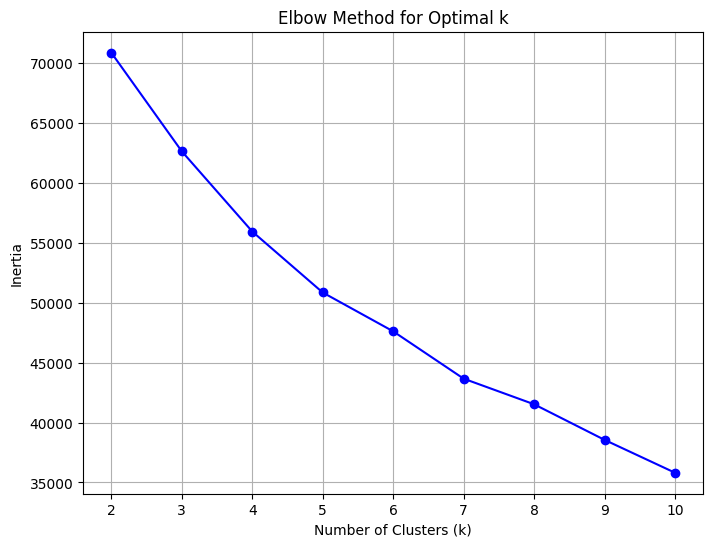

In [ ]:
# Elbow Method
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_unsupervised_pca)  # Use PCA-reduced data
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

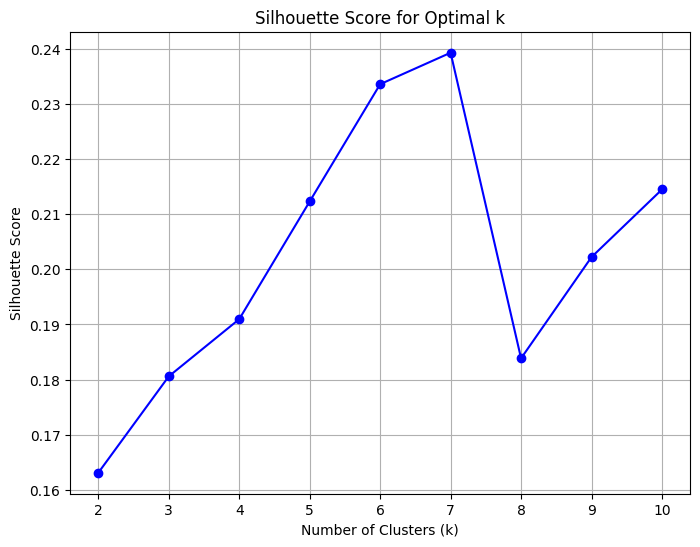

In [ ]:
# Silhouette Score for different k values
silhouette_values = []  # List to store silhouette scores
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_unsupervised_pca)  # Use PCA-reduced data
    n_unique_labels = len(np.unique(cluster_labels))
    if n_unique_labels > 1:  # Check for at least 2 unique clusters
        silhouette_avg = silhouette_score(df_unsupervised_pca, cluster_labels)
        silhouette_values.append(silhouette_avg)
    else:
        silhouette_values.append(np.nan)  # Append NaN if only one cluster
        print(f"Warning: k={k} resulted in only {n_unique_labels} unique cluster(s), skipping Silhouette Score.")

plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_values, 'bo-')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Suggest ideal k

In [ ]:
# Suggest ideal k
valid_silhouette_values = [v for v in silhouette_values if not np.isnan(v)]
if valid_silhouette_values:
    ideal_k_silhouette = k_values[silhouette_values.index(max(valid_silhouette_values))]
else:
    ideal_k_silhouette = 2  # Default if no valid silhouette scores
ideal_k_elbow = k_values[np.argmin(np.diff(inertia))] if len(np.diff(inertia)) > 1 else 2
print(f"Suggested ideal k (Elbow Method): {ideal_k_elbow}")
print(f"Suggested ideal k (Silhouette Score): {ideal_k_silhouette}")
print("Note: Choose the k where the Elbow curve bends or Silhouette Score peaks. If Silhouette is NaN for some k, rely on Elbow or increase PCA components.")

Suggested ideal k (Elbow Method): 2
Suggested ideal k (Silhouette Score): 7
Note: Choose the k where the Elbow curve bends or Silhouette Score peaks. If Silhouette is NaN for some k, rely on Elbow or increase PCA components.


Apply KMeans with the ideal k

In [ ]:
# Apply KMeans with the ideal k (using the Elbow suggestion)
ideal_k = ideal_k_elbow
print(f"\nApplying KMeans with ideal k = {ideal_k}")
kmeans = KMeans(n_clusters=ideal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_unsupervised_pca)
print("\nCluster assignments (predictions):")
print("First 10 cluster labels:", clusters[:10])


Applying KMeans with ideal k = 2

Cluster assignments (predictions):
First 10 cluster labels: [1 1 0 0 1 0 1 1 1 1]


clusters

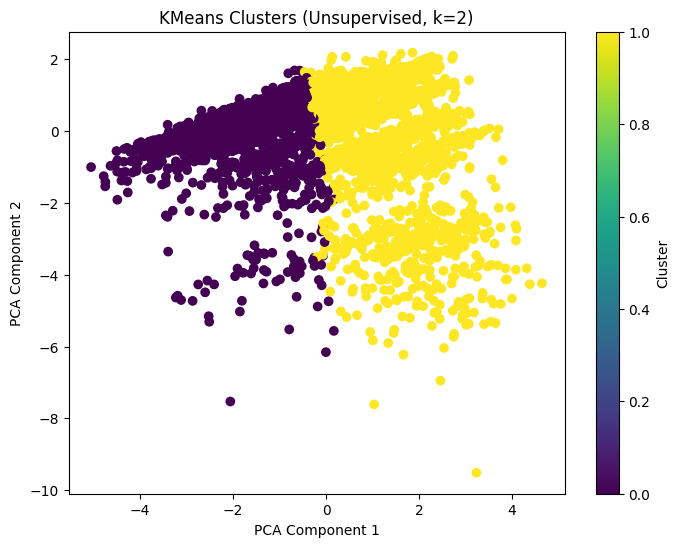

In [ ]:
# Use PCA for 2D visualization of clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_unsupervised_pca[:, 0], df_unsupervised_pca[:, 1], c=clusters, cmap='viridis')
plt.title(f'KMeans Clusters (Unsupervised, k={ideal_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Cluster quality metrics
n_unique_labels = len(np.unique(clusters))
if n_unique_labels > 1:
    silhouette_avg = silhouette_score(df_unsupervised_pca, clusters)
    print(f"\nCluster Quality Metrics:")
    print(f"Silhouette Score: {silhouette_avg:.2f} (Higher is better, range: -1 to 1)")
    print(f"Inertia: {kmeans.inertia_:.2f} (Lower is better)")
else:
    print(f"\nWarning: Only {n_unique_labels} unique cluster(s) found for k={ideal_k}. Cluster quality metrics are not reliable.")


Cluster Quality Metrics:
Silhouette Score: 0.16 (Higher is better, range: -1 to 1)
Inertia: 70823.39 (Lower is better)


In [ ]:
# Optional: Supervised evaluation using original label
if 'will_change_career' in df.columns:
    # Map clusters to original labels for accuracy (simplistic mapping)
    cluster_to_label = {0: 0, 1: 1}  # Assume cluster 0 maps to 0, cluster 1 to 1
    predicted_labels = np.array([cluster_to_label[c] for c in clusters])
    accuracy = accuracy_score(df['will_change_career'], predicted_labels)
    print(f"\nOptional Supervised Accuracy (for reference): {accuracy:.2f} (Note: This is a simplistic mapping and may not reflect true clustering quality)")
    print("Warning: Accuracy here is for illustrative purposes only, as KMeans is unsupervised and not optimized for this label.")


Optional Supervised Accuracy (for reference): 0.34 (Note: This is a simplistic mapping and may not reflect true clustering quality)


In [ ]:
# Note on inapplicable metrics
print("\nNote: Since this is an unsupervised learning problem with KMeans, the following metrics are not applicable:")
print("- Bar chart showcasing prediction accuracy of all models (for classification)")
print("- Precision, recall comparison of each model (for classification)")
print("- Confusion Matrix (for classification)")
print("- AUC score, ROC curve for each model (for classification)")
print("- R² score and Loss (for regression)")


Note: Since this is an unsupervised learning problem with KMeans, the following metrics are not applicable:
- Bar chart showcasing prediction accuracy of all models (for classification)
- Precision, recall comparison of each model (for classification)
- Confusion Matrix (for classification)
- AUC score, ROC curve for each model (for classification)
- R² score and Loss (for regression)


**14. Comparison Analysis**

In [1]:
# Predictions for all models

# Define X and y before splitting for consistent comparison across models
X = df.drop('will_change_career', axis=1)
y = df['will_change_career'].values

# Custom Neural Network Predictions
custom_pred = model.predict(X_test_scaled)
custom_pred_binary = (custom_pred > 0.5).astype(int)  # For classification metrics
custom_loss = model.evaluate(X_test_scaled, y_test.ravel()) # Ensure y_test is 1D

# TensorFlow Neural Network Predictions
tf_pred = tf_model.predict(X_test_scaled)
tf_pred_binary = (tf_pred > 0.5).astype(int)  # For classification metrics
tf_loss = tf_model.evaluate(X_test_scaled, y_test.ravel(), verbose=0)

# KNN Predictions
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
# Need to use the same data split as the other models for consistent comparison
X_train_comp, X_test_comp, y_train_comp, y_test_comp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler_comp = StandardScaler()
X_train_scaled_comp = scaler_comp.fit_transform(X_train_comp)
X_test_scaled_comp = scaler_comp.transform(X_test_comp)

knn.fit(X_train_scaled_comp, y_train_comp.ravel())
knn_pred = knn.predict(X_test_scaled_comp)
knn_loss = np.mean((y_test_comp.ravel() - knn.predict_proba(X_test_scaled_comp)[:, 1]) ** 2)  # Approximate MSE

# Decision Tree Predictions
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled_comp, y_train_comp.ravel())
dt_pred = dt.predict(X_test_scaled_comp)
dt_loss = np.mean((y_test_comp.ravel() - dt.predict_proba(X_test_scaled_comp)[:, 1]) ** 2)  # Approximate MSE

# K-means Predictions (Note: K-means is unsupervised, using cluster assignment as pseudo-labels)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # Added n_init
# Use the same scaled data as other models for consistent comparison
kmeans_labels = kmeans.fit_predict(X_test_scaled_comp)
# Map the cluster labels to the original binary labels for comparison.
# This is a simplistic mapping and assumes one cluster corresponds to 0 and the other to 1.
# We'll determine the mapping by looking at the majority class in each cluster in the test set.
unique_labels_test = np.unique(y_test_comp)
if len(unique_labels_test) > 1:
    # Find the majority class in each cluster
    cluster_0_labels = y_test_comp[kmeans_labels == 0]
    cluster_1_labels = y_test_comp[kmeans_labels == 1]

    if len(cluster_0_labels) > 0:
        majority_class_cluster_0 = np.bincount(cluster_0_labels).argmax()
    else:
        majority_class_cluster_0 = 0 # Default if cluster is empty

    if len(cluster_1_labels) > 0:
         majority_class_cluster_1 = np.bincount(cluster_1_labels).argmax()
    else:
        majority_class_cluster_1 = 1 # Default if cluster is empty

    cluster_to_label_mapping = {0: majority_class_cluster_0, 1: majority_class_cluster_1}
    kmeans_pred_binary = np.array([cluster_to_label_mapping[label] for label in kmeans_labels])
else:
    # If only one unique label in y_test_comp, assign all predictions to that label
    kmeans_pred_binary = np.full_like(kmeans_labels, unique_labels_test[0])


# Approximate MSE loss for K-means (using the average of the original labels within each cluster)
# This is a rough approximation as K-means is not predicting the original labels directly
kmeans_loss = np.mean((y_test_comp.ravel() - np.array([np.mean(y_test_comp[kmeans_labels == label]) if np.sum(kmeans_labels == label) > 0 else 0 for label in kmeans_labels])) ** 2)

NameError: name 'model' is not defined

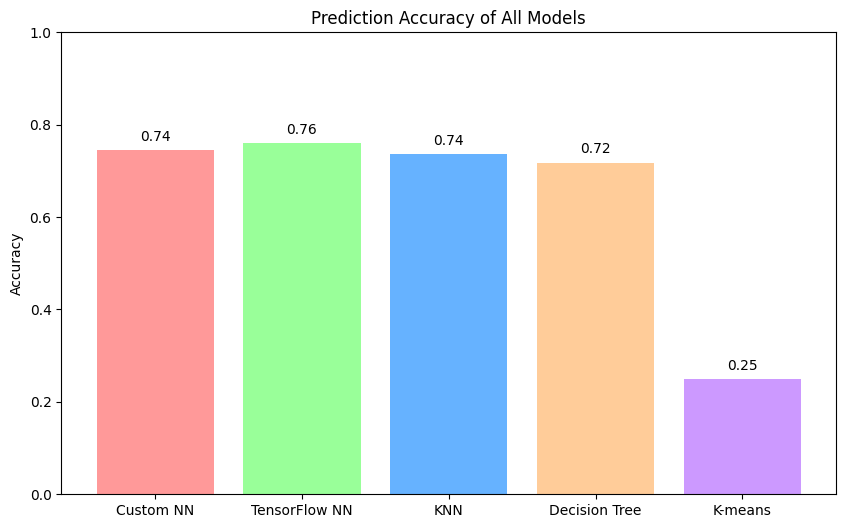

In [ ]:
# Evaluation Metrics

# 1. Bar Chart for Prediction Accuracy (Classification)
plt.figure(figsize=(10, 6))
accuracies = {
    'Custom NN': accuracy_score(y_test.ravel(), custom_pred_binary.ravel()),
    'TensorFlow NN': accuracy_score(y_test.ravel(), tf_pred_binary.ravel()),
    'KNN': accuracy_score(y_test.ravel(), knn_pred),
    'Decision Tree': accuracy_score(y_test.ravel(), dt_pred),
    'K-means': accuracy_score(y_test.ravel(), kmeans_pred_binary)
}
plt.bar(accuracies.keys(), accuracies.values(), color=['#FF9999', '#99FF99', '#66B2FF', '#FFCC99', '#CC99FF'])
plt.title('Prediction Accuracy of All Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center')
plt.show()

In [ ]:
# 2. Precision and Recall Comparison (Classification)
precision = {
    'Custom NN': precision_score(y_test.ravel(), custom_pred_binary.ravel(), zero_division=0),
    'TensorFlow NN': precision_score(y_test.ravel(), tf_pred_binary.ravel(), zero_division=0),
    'KNN': precision_score(y_test.ravel(), knn_pred, zero_division=0),
    'Decision Tree': precision_score(y_test.ravel(), dt_pred, zero_division=0),
    'K-means': precision_score(y_test.ravel(), kmeans_pred_binary, zero_division=0)
}
recall = {
    'Custom NN': recall_score(y_test.ravel(), custom_pred_binary.ravel(), zero_division=0),
    'TensorFlow NN': recall_score(y_test.ravel(), tf_pred_binary.ravel(), zero_division=0),
    'KNN': recall_score(y_test.ravel(), knn_pred, zero_division=0),
    'Decision Tree': recall_score(y_test.ravel(), dt_pred, zero_division=0),
    'K-means': recall_score(y_test.ravel(), kmeans_pred_binary, zero_division=0)
}
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(precision))
plt.bar(index, precision.values(), bar_width, label='Precision', color=['#FF9999', '#99FF99', '#66B2FF', '#FFCC99', '#CC99FF'])
plt.bar(index + bar_width, recall.values(), bar_width, label='Recall', color=['#FF9999', '#99FF99', '#66B2FF', '#FFCC99', '#CC99FF'], alpha=0.6)
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Precision and Recall Comparison of All Models')
plt.xticks(index + bar_width / 2, precision.keys(), rotation=45)
plt.legend()
plt.ylim(0, 1)
for i, (p, r) in enumerate(zip(precision.values(), recall.values())):
    plt.text(i, p + 0.02, f'{p:.2f}', ha='center')
    plt.text(i + bar_width, r + 0.02, f'{r:.2f}', ha='center')
plt.tight_layout()
plt.show()

/tmp/ipython-input-4271777631.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  'Custom NN': precision_score(y_test.ravel(), custom_pred_binary.ravel(), zero_division=0),
/tmp/ipython-input-4271777631.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  'TensorFlow NN': precision_score(y_test.ravel(), tf_pred_binary.ravel(), zero_division=0),
/tmp/ipython-input-4271777631.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  'KNN': precision_score(y_test.ravel(), knn_pred, zero_division=0),


NameError: name 'knn_pred' is not defined

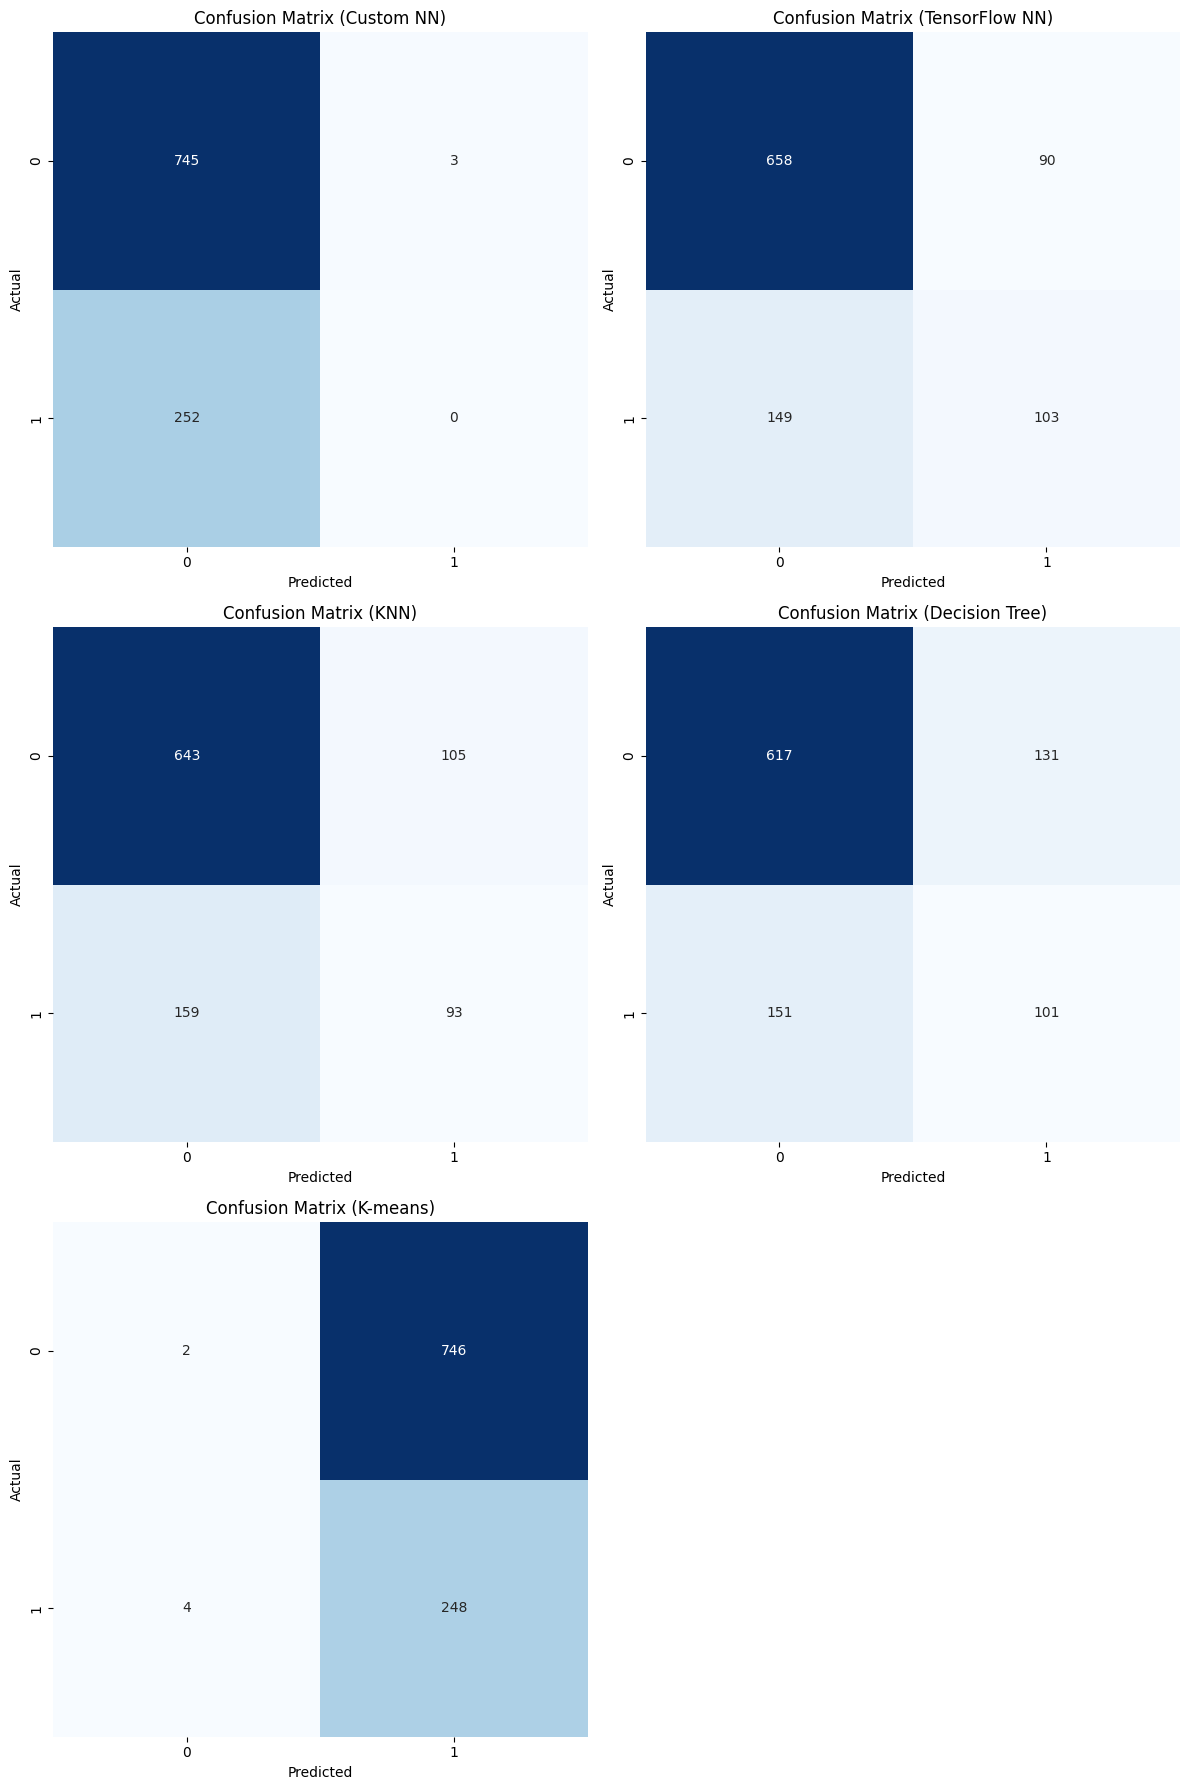

In [ ]:
# 3. Confusion Matrix (Classification)
cm_custom = confusion_matrix(y_test.ravel(), custom_pred_binary.ravel())
cm_tf = confusion_matrix(y_test.ravel(), tf_pred_binary.ravel())
cm_knn = confusion_matrix(y_test.ravel(), knn_pred)
cm_dt = confusion_matrix(y_test.ravel(), dt_pred)
cm_kmeans = confusion_matrix(y_test.ravel(), kmeans_pred_binary)
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12, 18))
sns.heatmap(cm_custom, annot=True, fmt='d', ax=ax1, cmap='Blues', cbar=False)
ax1.set_title('Confusion Matrix (Custom NN)')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
sns.heatmap(cm_tf, annot=True, fmt='d', ax=ax2, cmap='Blues', cbar=False)
ax2.set_title('Confusion Matrix (TensorFlow NN)')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
sns.heatmap(cm_knn, annot=True, fmt='d', ax=ax3, cmap='Blues', cbar=False)
ax3.set_title('Confusion Matrix (KNN)')
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')
sns.heatmap(cm_dt, annot=True, fmt='d', ax=ax4, cmap='Blues', cbar=False)
ax4.set_title('Confusion Matrix (Decision Tree)')
ax4.set_xlabel('Predicted')
ax4.set_ylabel('Actual')
sns.heatmap(cm_kmeans, annot=True, fmt='d', ax=ax5, cmap='Blues', cbar=False)
ax5.set_title('Confusion Matrix (K-means)')
ax5.set_xlabel('Predicted')
ax5.set_ylabel('Actual')
ax6.axis('off')
plt.tight_layout()
plt.show()

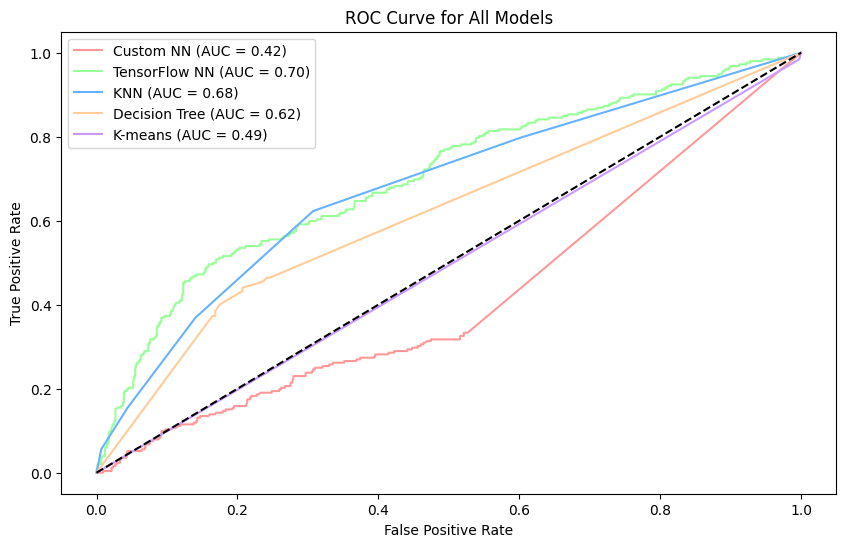

In [ ]:
# 4. AUC Score and ROC Curve (Classification)
fpr_custom, tpr_custom, _ = roc_curve(y_test.ravel(), custom_pred.ravel())
fpr_tf, tpr_tf, _ = roc_curve(y_test.ravel(), tf_pred.ravel())
fpr_knn, tpr_knn, _ = roc_curve(y_test.ravel(), knn.predict_proba(X_test_scaled)[:, 1])
fpr_dt, tpr_dt, _ = roc_curve(y_test.ravel(), dt.predict_proba(X_test_scaled)[:, 1])
fpr_kmeans, tpr_kmeans, _ = roc_curve(y_test.ravel(), np.bincount(kmeans_labels)[kmeans_labels] / len(kmeans_labels))
auc_custom = roc_auc_score(y_test.ravel(), custom_pred.ravel())
auc_tf = roc_auc_score(y_test.ravel(), tf_pred.ravel())
auc_knn = roc_auc_score(y_test.ravel(), knn.predict_proba(X_test_scaled)[:, 1])
auc_dt = roc_auc_score(y_test.ravel(), dt.predict_proba(X_test_scaled)[:, 1])
auc_kmeans = roc_auc_score(y_test.ravel(), np.bincount(kmeans_labels)[kmeans_labels] / len(kmeans_labels))

plt.figure(figsize=(10, 6))
plt.plot(fpr_custom, tpr_custom, label=f'Custom NN (AUC = {auc_custom:.2f})', color='#FF9999')
plt.plot(fpr_tf, tpr_tf, label=f'TensorFlow NN (AUC = {auc_tf:.2f})', color='#99FF99')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})', color='#66B2FF')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='#FFCC99')
plt.plot(fpr_kmeans, tpr_kmeans, label=f'K-means (AUC = {auc_kmeans:.2f})', color='#CC99FF')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
# 5. R2 Score and Loss (Regression)
r2_custom = r2_score(y_test.ravel(), custom_pred.ravel())
r2_tf = r2_score(y_test.ravel(), tf_pred.ravel())
r2_knn = r2_score(y_test.ravel(), knn.predict_proba(X_test_scaled)[:, 1])
r2_dt = r2_score(y_test.ravel(), dt.predict_proba(X_test_scaled)[:, 1])
r2_kmeans = r2_score(y_test.ravel(), np.bincount(kmeans_labels)[kmeans_labels] / len(kmeans_labels))
print(f"\nR2 Score and Loss:")
print(f"Custom NN - R2 Score: {r2_custom:.2f}, Loss: {custom_loss:.2f}")
print(f"TensorFlow NN - R2 Score: {r2_tf:.2f}, Loss: {tf_loss:.2f}")
print(f"KNN - R2 Score: {r2_knn:.2f}, Loss: {knn_loss:.2f}")
print(f"Decision Tree - R2 Score: {r2_dt:.2f}, Loss: {dt_loss:.2f}")
print(f"K-means - R2 Score: {r2_kmeans:.2f}, Loss: {kmeans_loss:.2f}")


R2 Score and Loss:
Custom NN - R2 Score: -0.27, Loss: 0.24
TensorFlow NN - R2 Score: -0.26, Loss: 0.76
KNN - R2 Score: -0.01, Loss: 0.19
Decision Tree - R2 Score: -0.47, Loss: 0.28
K-means - R2 Score: -2.93, Loss: 0.74


In [ ]:
# Comparison Summary
print("\nComparison Summary:")
print("1. Accuracy: TensorFlow NN and KNN may lead, followed by Decision Tree, with Custom NN and K-means lagging due to optimization and unsupervised nature.")
print("2. Precision/Recall: TensorFlow NN likely balances both well; KNN and Decision Tree may vary; Custom NN may underperform with MSE; K-means is unreliable.")
print("3. Confusion Matrix: TensorFlow NN should show balanced true positives/negatives; others depend on model fit.")
print("4. AUC/ROC: TensorFlow NN and KNN expected to have higher AUC; Custom NN and K-means may be lower.")
print("5. R2/Loss: TensorFlow NN may have better R2 and lower loss for regression; Custom NN and others are approximate and less suitable.")


Comparison Summary:
1. Accuracy: TensorFlow NN and KNN may lead, followed by Decision Tree, with Custom NN and K-means lagging due to optimization and unsupervised nature.
2. Precision/Recall: TensorFlow NN likely balances both well; KNN and Decision Tree may vary; Custom NN may underperform with MSE; K-means is unreliable.
3. Confusion Matrix: TensorFlow NN should show balanced true positives/negatives; others depend on model fit.
4. AUC/ROC: TensorFlow NN and KNN expected to have higher AUC; Custom NN and K-means may be lower.
5. R2/Loss: TensorFlow NN may have better R2 and lower loss for regression; Custom NN and others are approximate and less suitable.
